<a href="https://colab.research.google.com/github/AnaPaulaSouza/wit_test/blob/master/wit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

**Carregando o dataset**

In [17]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacaoes_treino), (imagens_teste, identificacaoes_teste)) = dataset.load_data()


**Exploração os dados**


In [18]:
len(imagens_teste)
imagens_treino.shape
imagens_teste.shape

len(identificacaoes_teste)
identificacaoes_treino.min()
identificacaoes_treino.max()

9

**Exibição dos dados**

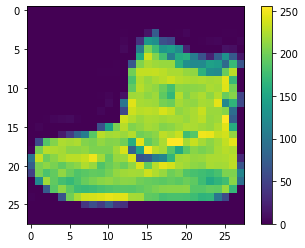

In [19]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casado', 'Sandália', 'Camisa', 
                           'Tênis', 'Bolsa', 'Bota'
                         ]
# plt.imshow(imagens_treino[0])
# plt.title(identificacaoes_treino[0])

# for imagem in range(10):
#   plt.subplot(2, 5, imagem+1)
#   plt.imshow(imagens_treino[imagem])
#   plt.title(nomes_de_classificacoes[identificacaoes_treino[imagem]])

plt.imshow(imagens_treino[0])
plt.colorbar()

**Normalizando as imagens**




In [20]:
imagens_treino = imagens_treino/float(255)

**Criando, compilando, treinando e normalizando o modelo**

In [ ]:
#camada 0 - entrada
#camada 1 - processamento
#camada 2 - saida

#Criando o modelo
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
]) 

#Compilando o modelo
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#Treinando o modelo
historico = modelo.fit(imagens_treino, identificacaoes_treino, epochs=10, validation_split=0.2)

**Salvando e carregando o modelo treinado**

In [21]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

**Visualizando as acurácias de treino e validação por época**

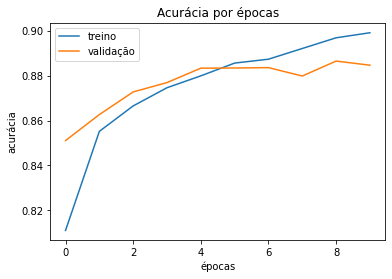

In [22]:
#Histórico em gráfico da Acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

**Visualizando as perdas de treino e validação por época**

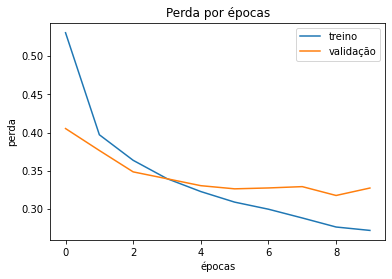

In [23]:
#Histórico em gráfico da rede
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

**Testando o modelo e o modelo salvo**

In [24]:
#Testando o modelo
testes = modelo.predict(imagens_teste)
print('Resultado teste:', np.argmax(testes[1]))
print('Número da imagem de teste:', identificacaoes_teste[1])

#Testando o modelo salvo
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste:', identificacaoes_teste[1])

Resultado teste: 2
Número da imagem de teste: 2
Resultado teste modelo salvo: 2
Número da imagem de teste: 2


**Avaliando o modelo**

In [25]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacaoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 2ms/step - loss: 50.4409 - accuracy: 0.8700
Perda do teste: 50.44087600708008
Acurácia do teste: 0.8700000047683716
